1. Data Loading and Cleaning

In [22]:
import pandas as pd

# Load dataset
df = pd.read_csv("Money Manager_01-06-2025.csv")

# Parse dates
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')

# Rename and drop unnecessary columns
df = df.rename(columns={'KES': 'Amount_KES'})
df = df.drop(columns=['Amount', 'Account.1', 'Subcategory'])


2. Prepare Data for Modeling

In [23]:
# Drop rows missing labels or text
df_model = df.dropna(subset=['Income/Expense', 'Note'])

# Define features and target
X = df_model['Note']
y = df_model['Income/Expense']


3. Train/Test Split and Pipeline

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create ML pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit model
pipeline.fit(X_train, y_train)

,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [25]:
# Train a classifier for Income vs Expense
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

X = df['Note']
y = df['Income/Expense']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', RandomForestClassifier(n_estimators=100))
])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     Expense       1.00      1.00      1.00        33
      Income       1.00      1.00      1.00        60

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93



4. Evaluate Model

Train and Save a Category Classifier

In [26]:
import streamlit as st
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# Load the classifier
model = joblib.load("income_expense_classifier.pkl")

st.set_page_config(layout="wide")
st.title("💸 Smart Transaction Classifier & Dashboard")

# File upload
uploaded_file = st.file_uploader("📤 Upload your transaction CSV", type=["csv"])

if uploaded_file:
    df = pd.read_csv(uploaded_file)

    if 'Note' not in df.columns:
        st.error("❌ Your file must contain a 'Note' column.")
    else:
        # Predict
        df['Predicted Type'] = model.predict(df['Note'])

        st.subheader("🔍 Predictions Table")
        st.dataframe(df[['Note', 'Predicted Type']])

        # Optional: Convert Date to datetime
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df['Month'] = df['Date'].dt.to_period('M')

        # Dashboard
        st.subheader("📊 Insights Dashboard")

        # 1. Pie chart of Income vs Expense
        st.markdown("### Income vs Expense Breakdown")
        pie_data = df['Predicted Type'].value_counts()
        fig1, ax1 = plt.subplots()
        ax1.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=90)
        ax1.axis('equal')
        st.pyplot(fig1)

        # 2. Bar chart of total amount by type (if Amount column exists)
        if 'KES' in df.columns:
            st.markdown("### Total Amount per Transaction Type")
            amount_summary = df.groupby('Predicted Type')['KES'].sum().reset_index()
            fig2, ax2 = plt.subplots()
            sns.barplot(data=amount_summary, x='Predicted Type', y='KES', ax=ax2)
            st.pyplot(fig2)

        # 3. Time trend (if Date column exists)
        if 'Date' in df.columns:
            st.markdown("### Monthly Transaction Volume")
            time_data = df.groupby(['Month', 'Predicted Type']).size().unstack().fillna(0)
            st.line_chart(time_data)

else:
    st.info("📂 Upload a file above to begin.")

2025-06-22 19:42:58.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.241 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


2025-06-22 19:42:58.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.243 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-22 19:42:58.244 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [27]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

     Expense       1.00      1.00      1.00        33
      Income       1.00      1.00      1.00        60

    accuracy                           1.00        93
   macro avg       1.00      1.00      1.00        93
weighted avg       1.00      1.00      1.00        93

Confusion Matrix:
 [[33  0]
 [ 0 60]]


5. Visualize Classification Results
Confusion Matrix (with heatmap)

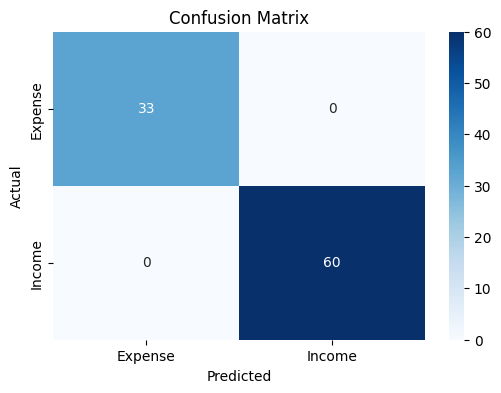

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Create a heatmap for confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


6. Save the Trained Model for Deployment

In [29]:
import joblib

# Save the entire pipeline to a file
joblib.dump(pipeline, "income_expense_classifier.pkl")


['income_expense_classifier.pkl']

Load the Model Later

In [30]:
# Load the model
loaded_model = joblib.load("income_expense_classifier.pkl")

# Predict on new data
new_preds = loaded_model.predict(["Loan Repayment from Peter", "Bought groceries", "Interest on savings"])
print(new_preds)


['Income' 'Income' 'Income']
